# Beyond Hello World, A Computer Vision Example
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow.

In [2]:
import tensorflow as tf

print(tf.__version__)

2023-03-09 16:35:21.795887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [3]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [4]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

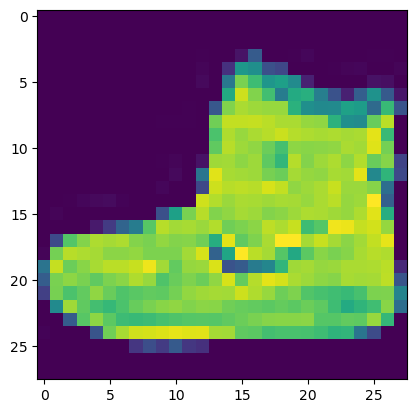

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [6]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why the dataset is split into two: training and testing? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them. 

In [7]:
# Build the classification model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),  # input layer, 28x28 pixels = 784 neurons
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), # HIDDEN LAYER, 128 neurons, random initialization
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # OUTPUT LAYER, 10 neurons, one for each class
                                    ])

2023-03-09 16:35:46.891434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [8]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs) # returns the index of the highest value
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [9]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', # loss function for classification, sparse_categorical_crossentropy -> loss function for classification with integer for LABELS!!!
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4973 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3711 - accuracy: 0.8667
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8920


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [10]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8781


[0.34469711780548096, 0.8780999779701233]

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

# Exploration Exercises

To explore further and deepen your understanding, try the below exercises:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [11]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.2729858e-07 1.0756670e-08 5.9473390e-08 2.9857166e-08 9.7617068e-08 3.6587946e-02 3.2048001e-07 7.3890209e-02 7.7893537e-07 8.8952053e-01]


**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [12]:
print(test_labels[0])

9


Lo que representan estos números es la probabilidad de que la imagen sea de cada una de las clases. Por ejemplo, si el número en la posición 0 es 0.1, significa que la probabilidad de que la imagen sea de la clase 0 es del 10%. Si el número en la posición 1 es 0.6, significa que la probabilidad de que la imagen sea de la clase 1 es del 60%. Y así sucesivamente. En este caso la primera imagen de nuestro set de testeo pertenece a la clase 9, que es la clase "Ankle boot". Se llaman parametros de salida, porque son los que se obtienen al final de la red neuronal.

### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


La respuesta correcta es que la lista representa las probabilidades de que la imagen sea de cada una de las clases.

### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


Sabemos que este item pertenece a la clase ankle boot porque ankle boot es la clase 9 y hay de 0 a 9 clases. La clase 9 es la que tiene la probabilidad más alta, por lo que es la que más se parece a la imagen.

### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [21]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2031
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0788
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0369
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[7.9955814e-10 8.5225375e-11 6.2767327e-08 3.1799711e-06 2.7537296e-13 6.4572719e-10 1.9095787e-13 9.9999666e-01 1.6490408e-10 4.4337789e-08]
7


Al experimentar con más o menos neuronas he podido llegar a la conclusion de que al agregar más neuronas, el tiempo de entrenamiento aumenta, pero la precisión del modelo también. Esto se debe a que al tener más neuronas, la red neuronal tiene más capacidad de procesamiento, por lo que puede llegar a ser más precisa, pero también más lenta. Por otro lado, al tener menos neuronas, la red neuronal tiene menos capacidad de procesamiento, por lo que puede llegar a ser menos precisa, pero también más rápida. Me he dado cuenta que 512 neuronas como lo especifica el ejercicio para este caso llega a ser suficiente para obtener una precisión aceptable.

In [22]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1827
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0740
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0492
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0352
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[3.23258031e-10 1.29255007e-09 3.28634648e-08 4.54010632e-07 9.58398044e-15 2.45865939e-10 1.37291505e-14 9.99999285e-01 2.18438705e-11 2.02932668e-07]
7


### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


En este caso el entrenamiento toma más tiempo, pero la precisión del modelo también aumenta aunque no de manera significativa.

### Exercise 3: 

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case? 



In [23]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


Para este ejercicio he eliminado la capa Flatten() y he obtenido el siguiente error:
    
    ```
    `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)
    ```

Lo que sucede es que la capa Flatten() convierte la matriz de 28x28 en un vector de 784 elementos, por lo que la capa Flatten() es necesaria para que la red neuronal pueda procesar la imagen. Si no se tiene esta capa, la red neuronal no podrá procesar la imagen y por lo tanto no podrá clasificarla.
    

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.


In [26]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


2023-03-09 16:56:50.176037: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 5 6 4 9 4 1 5 9 7 1 5 9 1 5 7 7 5 4 6 9 1 5 4 1 0 7 1 9 1 3 1 8


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/73/62cgzvlx2rjdjj4l1r5h6pqr0000gn/T/ipykernel_1014/2244454557.py", line 16, in <module>
      model.fit(training_images, training_labels, epochs=5)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 5 6 4 9 4 1 5 9 7 1 5 9 1 5 7 7 5 4 6 9 1 5 4 1 0 7 1 9 1 3 1 8
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_385358]

En este caso tenemos otro error más o menos similar al anterior, pero en este caso el error es que la cantidad de neuronas en la capa de salida no coincide con la cantidad de clases que tenemos. En este caso tenemos 10 clases, por lo que la capa de salida debe tener 10 neuronas. Si se tiene una cantidad diferente de neuronas en la capa de salida, la red neuronal no podrá clasificar las imágenes correctamente. Si ponemos en cambio un valor mayor a 10, la red neuronal si podra hacer clasificacion pero no de manera correcta, pues no tenemos las clases necesarias para clasificar las imagenes. Si ponemos un valor menor a 10, la red neuronal no podra clasificar las imagenes correctamente, pues no tendra suficientes neuronas para clasificarlas.

### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 


In [27]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    # Add a layer here, 512 nodos RELU
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    # Add a layer here, 10 nodos, softmax
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1848
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0781
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0538
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0416
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.5670944e-10 1.9564814e-09 5.0800452e-08 3.2685830e-06 4.7929244e-11 2.0239301e-07 1.1220229e-15 9.9999428e-01 1.5449443e-08 2.2960842e-06]
7


Me he dado cuenta que agregar esta capa extra a la red neuronal si afecta tanto a la precision como al tiempo de ejecucion como tambien a la cantidad de epocas que se necesitan para entrenar la red neuronal. Al agregar esta capa extra, el tiempo de ejecucion aumenta, la precision del modelo tambien aumenta, pero el numero de epocas que se necesitan para entrenar la red neuronal disminuye. Esto se debe a que al tener una capa extra, la red neuronal tiene más capacidad de procesamiento, por lo que puede llegar a ser más precisa, pero también más rápida. 

### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [28]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2647
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1123
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0766
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0562
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0157
Epoch 11/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0132
Epoch 12/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116
E

In [29]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2612
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1138
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0787
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0581
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0460
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0297
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0190
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158
Epoch 11/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0155
Epoch 12/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0116
E

Efectivamente la red neuronal básica con 15 épocas se comporta similar a la del anterior ejercicio en la cual agrefamos una capa más de procesamiento, el problema es que es más lenta que agregar una capa más pero casi igual de eficiente, por otro lado la red neuronal básica con 30 épocas es mucho más lenta que la red neuronal básica con 15 épocas, la presicion del modelo en mi caso hasta ha disminuido, por lo que no es recomendable entrenar la red neuronal con 30 épocas.

### Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [30]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.5267
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3443
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2891
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.2569811e-32 3.1556718e-28 1.2822639e-14 5.7671394e-19 1.0597572e-24 2.2612796e-27 0.0000000e+00 1.0000000e+00 2.2204302e-26 1.1140366e-23]
7


La red neuronal se comporta diferente pues al no normalizar los datos, la red neuronal no podrá procesarlos correctamente, por lo que no podrá clasificar las imagenes correctamente. Vemos que la presicion del modelo es mucho menor que la del modelo anterior, por lo que no es recomendable entrenar la red neuronal sin normalizar los datos.

### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.90): # Experiment with changing this value
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])


Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4739 - accuracy: 0.8321
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3595 - accuracy: 0.8673
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3232 - accuracy: 0.8811
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.8896
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2809 - accuracy: 0.8963
Epoch 6/50
1864/1875 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.9012
Reached 85% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9013


Efectivamente usar Callbacks es de gran utilidad pues nos permite detener el entrenamiento de la red neuronal cuando se alcanza un valor deseado, por ejemplo, si queremos que la red neuronal tenga una precision de 90% y se alcanza este valor despues de 6 epocas, no es necesario seguir entrenando la red neuronal pues ya se alcanzo el valor deseado.